# This notebook is prepared by ApplAi's Technical And Training Depratment.
- Please Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)


# **Task 1: Importing libraries and Exploring the Dataset.**

In [ ]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import pandas.core.series
from tabulate import tabulate
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


# Importing the data:
# --------------------
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.info()
print("-" * 70)
# Getting General info:
# ---------------------
print(sum(df.duplicated(subset="id")) == 0)
print("-" * 70)
# Checking nulls percentage in the data:
# --------------------------------------
print(df.isnull().sum() * 100 / df.shape[0])
print("-" * 70)
# Getting the Description of data:
# --------------------------------
print(df.describe())
print("-" * 70)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
----------------------------------------------------------------------
True
----------------------------------------------------------------------
id        

# **Task 2: Defining Exploratory Data Analysis with an overview of the whole project and Creating visual methods to analyze the data.**

1 - Here we will see the possibility of a stroke in relation to Gender:
-----------------------------------------------------------------------


In [ ]:
def generatePercentage(column: pandas.core.series.Series, dataFrame: pandas.DataFrame, columnName: str) -> None:
    sns.countplot(x=columnName, hue="stroke", data=dataFrame).set(title=f"{columnName} vs Possibility of Stroke")
    print("-" * 70)
    for element in list(column.unique()):
        df_non = df.loc[(column == element)]
        df_stroke = df.loc[(column == element) & (df['stroke'] == 1)]
        print(f"{round((len(df_stroke) / len(df_non)) * 100, 2)}% of {element} people are expected to have stroke.")
    print("-" * 70)

----------------------------------------------------------------------
5.11% of Male people are expected to have stroke.
4.71% of Female people are expected to have stroke.
----------------------------------------------------------------------


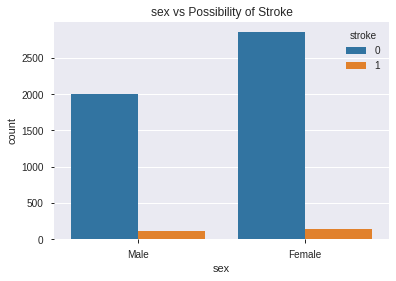

In [ ]:
def gender(x):
    if x == 'Male':
        return "Male"
    else:
        return "Female"

df['sex'] = df.gender.apply(lambda x: gender(x))
generatePercentage(df['sex'], df, 'sex')

2 - Here we will see the possibility of a stroke for Age:
-------------------------------------------------------

----------------------------------------------------------------------
12.68% of Old Person people are expected to have stroke.
2.97% of Adult people are expected to have stroke.
0.27% of Child people are expected to have stroke.
0.0% of Young people are expected to have stroke.
----------------------------------------------------------------------


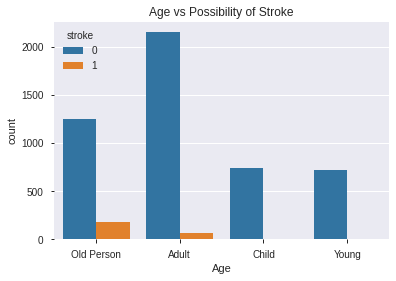

In [ ]:
def Age(x):
    if 0 <= x <= 15:
        return "Child"
    elif 16 <= x < 29:
        return "Young"
    elif 30 <= x < 60:
        return "Adult"
    else:
        return "Old Person"

df['Age'] = df.age.apply(lambda x: Age(x))
generatePercentage(df['Age'], df, 'Age')

3 - Here we will see the possibility of a stroke in relation to Blood Pressure:
------------------------------------------------------------------------------

----------------------------------------------------------------------
3.97% of Normal people are expected to have stroke.
13.25% of High Tension affected people are expected to have stroke.
----------------------------------------------------------------------


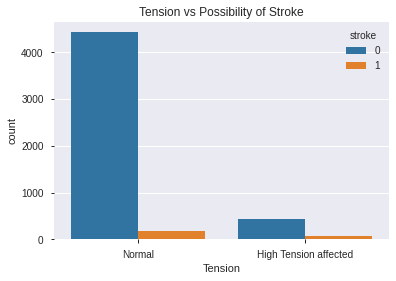

In [ ]:
def tension(x):
    if x == 1:
        return "High Tension affected"
    else:
        return "Normal"

df['Tension'] = df.hypertension.apply(lambda x: tension(x))
generatePercentage(df['Tension'], df, 'Tension')

4 - Here we will see the possibility of a stroke for Heart Disease:
-------------------------------------------------------------------

----------------------------------------------------------------------
17.03% of heart disease patients people are expected to have stroke.
4.18% of non-heart disease patients people are expected to have stroke.
----------------------------------------------------------------------


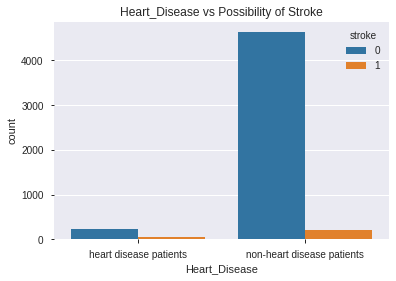

In [ ]:
def heart(x):
    if x == 1:
        return "heart disease patients"
    else:
        return "non-heart disease patients"

df['Heart_Disease'] = df.heart_disease.apply(lambda x: heart(x))
generatePercentage(df['Heart_Disease'], df, 'Heart_Disease')

5 - Here we will see the possibility of a stroke in relation to the Social situation:
-----------------------------------------------------------------------------

----------------------------------------------------------------------
6.56% of Married people are expected to have stroke.
1.65% of Single people are expected to have stroke.
----------------------------------------------------------------------


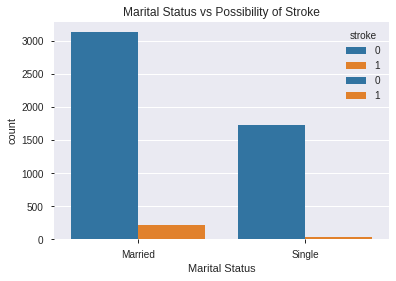

In [ ]:
def marry(x):
    if x == 'Yes':
        return "Married"
    else:
        return "Single"

df['Marital Status'] = df.ever_married.apply(lambda x: marry(x))
sns.countplot(x="Marital Status", hue="stroke", data=df)
generatePercentage(df['Marital Status'], df, "Marital Status")

6 - Here we will see the possibility of a stroke for the Living space:
----------------------------------------------------------------------

----------------------------------------------------------------------
5.2% of Urban people are expected to have stroke.
4.53% of Rural people are expected to have stroke.
----------------------------------------------------------------------


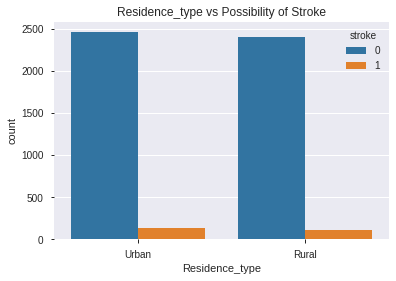

In [ ]:
generatePercentage(df['Residence_type'], df, "Residence_type")

7 - Here we will see the possibility of a stroke for the Glucose Level:
----------------------------------------------------------------------

----------------------------------------------------------------------
13.01% of Diabetic people are expected to have stroke.
3.68% of Normal people are expected to have stroke.
2.81% of Pre_Diabetic people are expected to have stroke.
----------------------------------------------------------------------


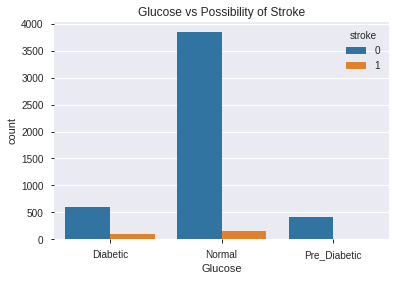

In [ ]:
def glucoseLevel(x):
    if 50 <= x <= 120:
        return "Normal"
    elif 121 <= x < 160:
        return "Pre_Diabetic"
    else:
        return "Diabetic"

df['Glucose'] = df.avg_glucose_level.apply(lambda x: glucoseLevel(x))
generatePercentage(df['Glucose'], df, 'Glucose')

8 - Here we will see the possibility of a stroke in relation to BMI
------------------------------------------------------------------

----------------------------------------------------------------------
6.42% of Obese people are expected to have stroke.
2.91% of Healthy Weight people are expected to have stroke.
5.32% of Overweight people are expected to have stroke.
0.29% of Underweight people are expected to have stroke.
----------------------------------------------------------------------


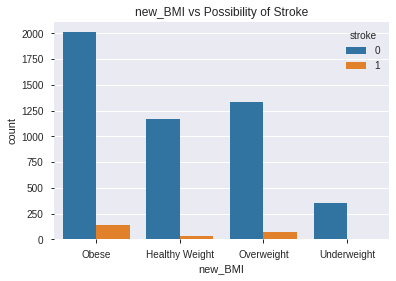

In [ ]:
def bmi(x):
    if x <= 18.5:
        return "Underweight"
    elif 18.6 <= x < 24.9:
        return "Healthy Weight"
    elif 25 <= x <= 29.9:
        return "Overweight"
    else:
        return "Obese"

df['new_BMI'] = df.bmi.apply(lambda x: bmi(x))
generatePercentage(df['new_BMI'], df, 'new_BMI')

9 - Here we will see the possibility of a stroke for Smokers:
-------------------------------------------------------------

----------------------------------------------------------------------
7.91% of formerly smoked people are expected to have stroke.
4.76% of never smoked people are expected to have stroke.
5.32% of smokes people are expected to have stroke.
3.04% of Unknown people are expected to have stroke.
----------------------------------------------------------------------


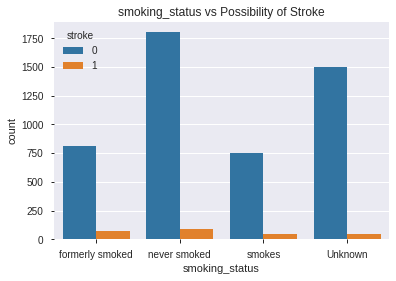

In [ ]:
generatePercentage(df['smoking_status'], df, "smoking_status")

10 -  Here we will see the possibility of a stroke for the type of Job:
----------------------------------------------------------------

----------------------------------------------------------------------
5.09% of Private people are expected to have stroke.
7.94% of Self-employed people are expected to have stroke.
5.02% of Govt_job people are expected to have stroke.
0.29% of children people are expected to have stroke.
0.0% of Never_worked people are expected to have stroke.
----------------------------------------------------------------------


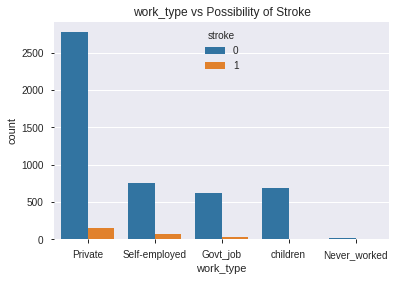

In [ ]:
generatePercentage(df["work_type"], df, "work_type")

In [ ]:
# Visualizing Y(OutCome Data):
# ----------------------------
dist = df['stroke'].value_counts()
colors = ['mediumturquoise', 'darkorange']
trace = go.Pie(values=(np.array(dist)), labels=dist.index)
layout = go.Layout(title='Stroke Outcome')
data = [trace]
fig = go.Figure(trace, layout)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=1)))

# **Task 3: Checking missing values and Outliers & preprocessing data.**

In [ ]:
# filling null values of the BMI column with the average:
# -------------------------------------------------------
avg = df['bmi'].mean()
df = df.fillna(value=avg)
print(df.isnull().sum())
pd.options.mode.chained_assignment = None

# label encoding the string values in [gender, ever_married, work_type,
# residence_type, smoking_status] into numerical values:
# ---------------------------------------------------------------------
def labelEncoder(column: pandas.core.series.Series) -> None:
    uniqueElements = list(column.unique())
    elementDict = {}
    for i in range(len(uniqueElements)):
        elementDict[uniqueElements[i]] = i
    for i in range(len(column)):
        column[i] = elementDict[column[i]]

# applying function to the selected columms:
# ------------------------------------------
labelEncoder(df["gender"])
labelEncoder(df["ever_married"])
labelEncoder(df["work_type"])
labelEncoder(df["Residence_type"])
labelEncoder(df["smoking_status"])

# changing the type of the affected columns so that they can be included
# in future operations:
# ----------------------------------------------------------------------
df["gender"] = df["gender"].astype('int64')
df["ever_married"] = df["ever_married"].astype('int64')
df["Residence_type"] = df["Residence_type"].astype('int64')
df["work_type"] = df["work_type"].astype('int64')
df["smoking_status"] = df["work_type"].astype('int64')

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
# normalizing data from columns[avg_glucose_level, bmi] using min-max normalization:
# -----------------------------------------------------------------------------------
def normalizer(column: pandas.core.series.Series) -> None:
    for i in range(len(column)):
        column[i] = ((column[i] - column.min()) / (column.max() - column.min()))


normalizer(df['avg_glucose_level'])
normalizer(df['bmi'])

print(df.head())
print(df.info())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level       bmi   smoking_status  \
0        Private          Urban           0.801265  0.301260  formerly smoked   
1  Self-employed          Rural           0.743374       NaN     never smoked   
2        Private          Rural           0.388110  0.330927     never smoked   
3        Private          Urban           0.629595  0.350454           smokes   
4  Self-employed          Rural           0.640246  0.243567     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFr

# **Task 4: create a model that fits the data.**


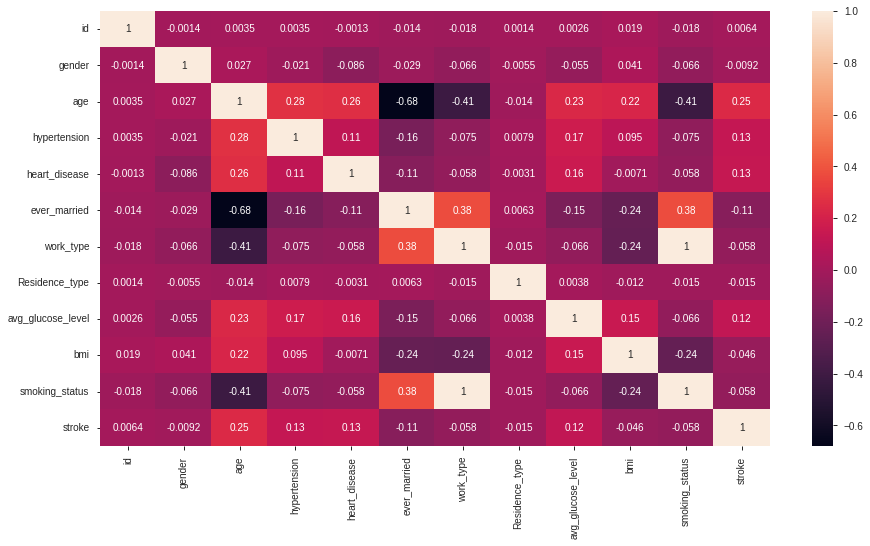

RandomForestClassifier(max_depth=300)

In [ ]:
# Checking the best features for data:
# ---------------------------------------
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Choosing columns for X and Y data:
# ----------------------------------
X = df[["age", "hypertension", "heart_disease", "ever_married", "avg_glucose_level"]]
Y = df["stroke"]

# Splitting data into training and testing sets:
# ---------------------------------------------
X_train, X_test, Y_train, Y_test \
    = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Model 1: logistic Regression:
# -----------------------------
log_Model = LogisticRegression(multi_class="auto", solver="lbfgs", fit_intercept=True)
log_Model.fit(X_train, Y_train)

# Model 2: Random Forest:
# --------------------
svc_Model = RandomForestClassifier(max_depth=300, n_estimators=100)
svc_Model.fit(X_train, Y_train)

# **Task 5: creating an accuracy table.**




In [ ]:
# creating function to calculate the results:
# -------------------------------------------
def getModelResults(Model, XTrain, YTrain, XTest, YTest) -> list:
    train_score = Model.score(XTrain, YTrain)
    test_score = Model.score(XTest, YTest)
    prediction = Model.predict(XTest)
    MSE = mean_squared_error(np.asarray(YTest), prediction)
    return [train_score, test_score, MSE]

# getting the results of the first model:
# ---------------------------------------
print("Logistic Model")
print("*" * 70)
res = getModelResults(log_Model, X_train, Y_train, X_test, Y_test)
print(f"Training score: {round(res[0] * 100, 2)}%.")
print(f"Test score: {res[1] * 100}%.")
print(f"Mean Square Error (MSE): {res[2] * 100}%")
print("*" * 70)

# getting the results of the second model:
# ----------------------------------------
print("RFC Model")
print("*" * 70)
res2 = getModelResults(svc_Model, X_train, Y_train, X_test, Y_test)
print(f"Training score: {round(res2[0] * 100, 2)}%.")
print(f"Test score: {round(res2[1] * 100, 2)}%.")
print(f"Mean Square Error (MSE): {round(res2[2] * 100, 2)}%")
print("*" * 70)

Logistic Model
**********************************************************************
Training score: 93.91%.
Test score: 100.0%.
Mean Square Error (MSE): 0.0%
**********************************************************************
RFC Model
**********************************************************************
Training score: 100.0%.
Test score: 97.36%.
Mean Square Error (MSE): 2.64%
**********************************************************************


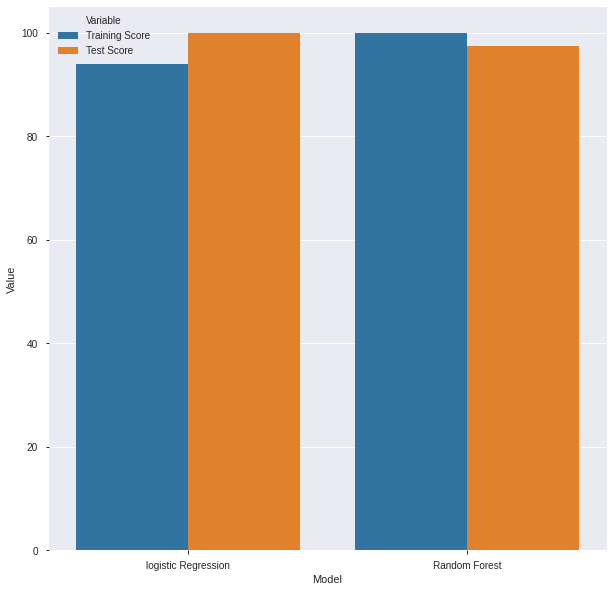

In [ ]:
# Score Visualizations:
# ---------------------
df = pandas.DataFrame({
    'Model': ['logistic Regression', 'Random Forest'],
    'Training Score': [res[0]*100, res2[0]*100],
    'Test Score': [res[1]*100, res2[1]*100]
})
fig, ax1 = plt.subplots(figsize=(10, 10))
ModelData = df.melt(id_vars='Model').rename(columns=str.title)
sns.barplot(x='Model', y='Value', hue='Variable', data=ModelData, ax=ax1)
sns.despine(fig)

# (#) Conclusion:
-------------
>After analyzing the current data (healthcare-datset-stroke-data.csv) we've reached the following assumptions:

>( . ) Regarding the data:

* Males are more likely to have strokes while women are less likely to have strokes.
* Old people are more likely to have strokes while young ones are less likely to have strokes.
* People affected with high tension are more likely to have strokes while people have normal blood pressure are less likely to have strokes.
* People affected with heart diseases are more likely to devlop strokes while healthy people are less likely to have strokes.
* Married people are more likely to have strokes while single people are less likely to devlop strokes.
* People living in urban enviroment are more likely to devlop strokes than people living in rural enviroment.
* The chance of getting a stroke gets higher as the glucose level in the blood increases.
* The Chance of getting a stroke gets higher as the percentage of the fats in body increases.
* People who come in contact with smoking in their life are more likely to have strokes.
* Self-employement work system has the highest chance of getting affected by stokes.

>( . ) Regarding the Models used:


* It seems that using logistic Regression model gives Test Score and Mean Square Error (MSE).
* Using Random Forest Classifier gives better Training Score.






The Assumptions in a form of table:

In [ ]:
# Tabulating the result:
# ----------------------
print(tabulate([["Males", 'Females'],
                ["Old people", "Young People"],
                ["People with high tension", "People having normal blood pressure"],
                ["People with Heart disease", "People with Healthy Heart"],
                ["Married People", "Single People"],
                ["People living in urban enviroment", "People living in rural enviroment"],
                ["People having high level of glucose", "People having normal level of glucose"],
                ["People with high fat rate", "People with normal fat rate"],
                ["Smokers", "Non-smokers"],
                ["People working with self-employment system", "Other work systems"]],
               headers=['Most Likely to Have a Stroke', 'Least likely to Have a Stroke'],
               tablefmt='fancy_grid', numalign="center", stralign="center"))
print("\n")
print(tabulate([['logistic Regression', res[0]*100, res[1]*100, res[2]*100],
                ['Random Forest', res2[0]*100, res2[1]*100, res2[2]*100]],
               headers=['Name', 'Training Score', 'Test Score', "Mean Square Error [MSE]"],
               tablefmt='fancy_grid', numalign="center", stralign="center"))
print("\n")

╒════════════════════════════════════════════╤═══════════════════════════════════════╕
│        Most Likely to Have a Stroke        │     Least likely to Have a Stroke     │
╞════════════════════════════════════════════╪═══════════════════════════════════════╡
│                   Males                    │                Females                │
├────────────────────────────────────────────┼───────────────────────────────────────┤
│                 Old people                 │             Young People              │
├────────────────────────────────────────────┼───────────────────────────────────────┤
│          People with high tension          │  People having normal blood pressure  │
├────────────────────────────────────────────┼───────────────────────────────────────┤
│         People with Heart disease          │       People with Healthy Heart       │
├────────────────────────────────────────────┼───────────────────────────────────────┤
│               Married People             